<AxesSubplot: xlabel='X0', ylabel='X1'>

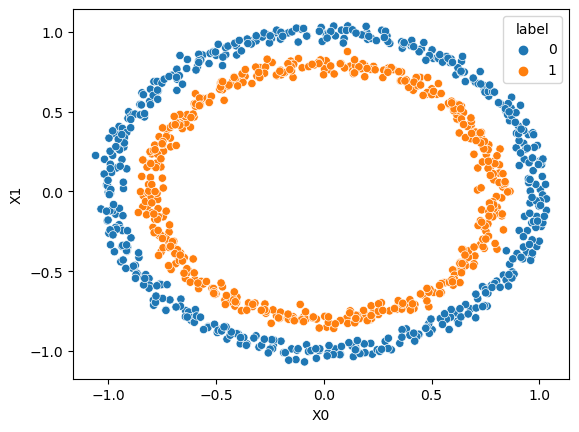

In [3]:
from sklearn.datasets import make_circles 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
n_samples = 1000 
X,y = make_circles(n_samples, 
          noise = 0.03, 
          random_state=42) 
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y}) 
sns.scatterplot(data=circles,x="X0",y="X1",hue="label")

In [15]:
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models  import  Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3) 
model=tf.keras.Sequential([ 
  tf.keras.layers.Dense(16,activation='relu',input_shape=(2,)), 
  tf.keras.layers.Dense(8,activation='relu'), 
  tf.keras.layers.Dense(1,activation='sigmoid') 
])

In [16]:
model.compile( 
      loss='binary_crossentropy', 
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
      metrics=['accuracy'] 
) 
model.summary() 


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                48        
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [17]:
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
22/22 [==============================] - 3s 2ms/step - loss: 0.6883 - accuracy: 0.5086
Epoch 2/10
22/22 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.5586
Epoch 3/10
22/22 [==============================] - 0s 1000us/step - loss: 0.6577 - accuracy: 0.6286
Epoch 4/10
22/22 [==============================] - 0s 1ms/step - loss: 0.6290 - accuracy: 0.7314
Epoch 5/10
22/22 [==============================] - 0s 1000us/step - loss: 0.5810 - accuracy: 0.7671
Epoch 6/10
22/22 [==============================] - 0s 1000us/step - loss: 0.4854 - accuracy: 0.9343
Epoch 7/10
22/22 [==============================] - 0s 952us/step - loss: 0.3978 - accuracy: 0.9329
Epoch 8/10
22/22 [==============================] - 0s 952us/step - loss: 0.2804 - accuracy: 0.9786
Epoch 9/10
22/22 [==============================] - 0s 1ms/step - loss: 0.1966 - accuracy: 0.9871
Epoch 10/10
22/22 [==============================] - 0s 1000us/step - loss: 0.1233 - accuracy: 0.9971


In [20]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.9867


[0.13483268022537231, 0.9866666793823242]

Text(0, 0.5, 'Loss Value')

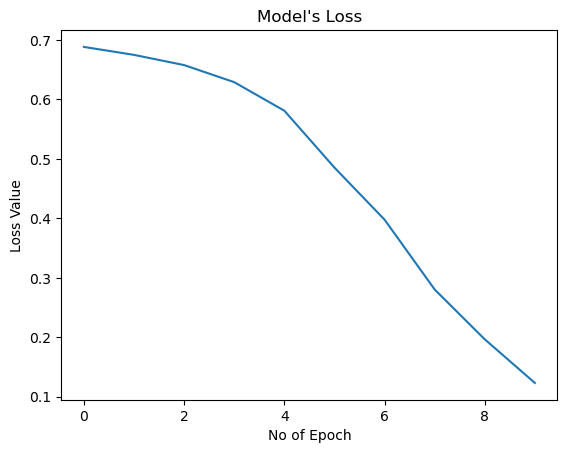

In [24]:
plt.title("Model's Loss") 
plt.plot(history.history['loss']) 
plt.xlabel("No of Epoch") 
plt.ylabel("Loss Value")

In [28]:
def plotq(model,X,y): 
    x_min,x_max = X[:,0].min()- 0.1,X[:,0].max() + 0.1 
    y_min , y_max = X[:,1].min()-0.1 ,X[:,1].max()+0.1 
 
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100), 
    np.linspace(y_min,y_max,100)) 
 
    x_in = np.c_[xx.ravel(),yy.ravel()] 
    y_pred = model.predict(x_in) 
 
    if len(y_pred[0]) > 1: 
        print("doing multiclass classification") 
        y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape) 
    else: 
        print("doing binary") 
        y_pred = np.round(y_pred).reshape(xx.shape) 
 
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7) 
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu) 
    plt.xlim(xx.min(),xx.max()) 
    plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 0s 644us/step
doing binary
313/313 [==============================] - 0s 641us/step
doing binary


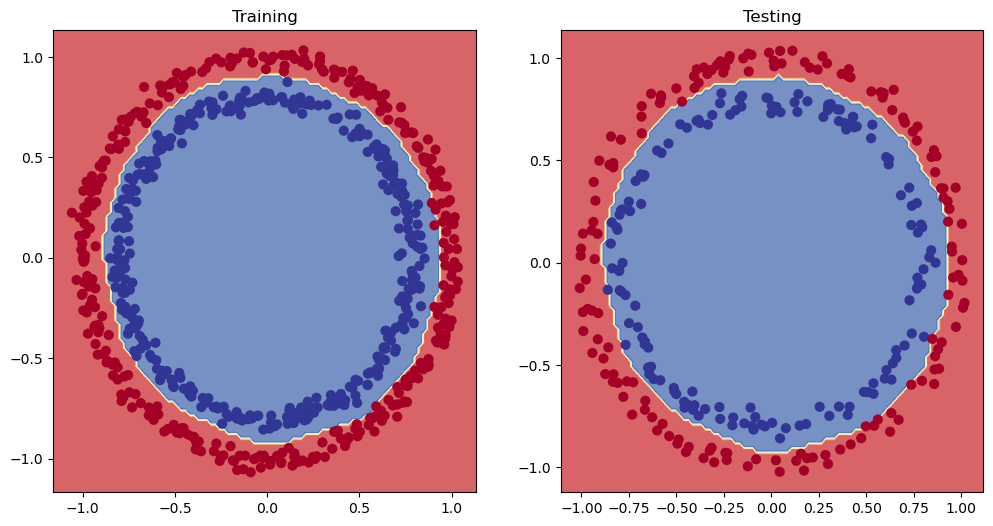

In [29]:
plt.figure(figsize=(12,6)) 
plt.subplot(1,2,1) 
plt.title('Training') 
plotq(model,X_train,y_train) 
plt.subplot(1,2,2) 
plt.title('Testing') 
plotq(model,X_test,y_test)